# Computation Biology Summer Program Hackathon: Summer 2022

## Survival Analysis Example Notebook

### By Michele W. , Ino D., and Maha E. 

#### Get cBioPortal Client

In [1]:
import pandas as pd

In [2]:
from bravado.client import SwaggerClient

cbioportal = SwaggerClient.from_url('https://www.cbioportal.org/api/api-docs',
                                config={"valid/ate_requests":False,"validate_responses":False,"validate_swagger_spec":False})
print(cbioportal)

SwaggerClient(https://www.cbioportal.org/api)


In [3]:
dir(cbioportal)

['Cancer_Types',
 'Clinical_Attributes',
 'Clinical_Data',
 'Copy_Number_Segments',
 'Discrete_Copy_Number_Alterations',
 'Gene_Panel_Data',
 'Gene_Panels',
 'Generic_Assay_Data',
 'Generic_Assays',
 'Genes',
 'Info',
 'Molecular_Data',
 'Molecular_Profiles',
 'Mutations',
 'Patients',
 'Sample_Lists',
 'Samples',
 'Server_running_status',
 'Studies',
 'Treatments']

#### Get All Study information, and relevant IMPACT study IDs

In [4]:
dir(cbioportal.Studies)

['fetchStudiesUsingPOST',
 'getAllStudiesUsingGET',
 'getStudyUsingGET',
 'getTagsForMultipleStudiesUsingPOST',
 'getTagsUsingGET']

In [5]:
Studies=cbioportal.Studies.getAllStudiesUsingGET(projection='DETAILED').result()

In [6]:
Studies[0]

CancerStudy(allSampleCount=92, cancerType=TypeOfCancer(cancerTypeId='acc', dedicatedColor='Purple', name='Adrenocortical Carcinoma', parent='adrenal_gland', shortName='ACC'), cancerTypeId='acc', citation=None, cnaSampleCount=90, completeSampleCount=75, description='TCGA Adrenocortical Carcinoma. Source data from <A HREF="http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/ACC/20160128/">GDAC Firehose</A>. Previously known as TCGA Provisional.', groups='PUBLIC', importDate='2022-03-04 17:47:56', massSpectrometrySampleCount=0, methylationHm27SampleCount=0, miRnaSampleCount=0, mrnaMicroarraySampleCount=0, mrnaRnaSeqSampleCount=0, mrnaRnaSeqV2SampleCount=79, name='Adrenocortical Carcinoma (TCGA, Firehose Legacy)', pmid=None, publicStudy=True, readPermission=True, referenceGenome='hg19', rppaSampleCount=46, sequencedSampleCount=90, status=0, studyId='acc_tcga')

In [7]:
cbioportal.Studies.fetchStudiesUsingPOST(studyIds=['acc_tcga']).result()

[CancerStudy(allSampleCount=92, cancerType=None, cancerTypeId='acc', citation=None, cnaSampleCount=None, completeSampleCount=None, description='TCGA Adrenocortical Carcinoma. Source data from <A HREF="http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/ACC/20160128/">GDAC Firehose</A>. Previously known as TCGA Provisional.', groups='PUBLIC', importDate='2022-03-04 17:47:56', massSpectrometrySampleCount=None, methylationHm27SampleCount=None, miRnaSampleCount=None, mrnaMicroarraySampleCount=None, mrnaRnaSeqSampleCount=None, mrnaRnaSeqV2SampleCount=None, name='Adrenocortical Carcinoma (TCGA, Firehose Legacy)', pmid=None, publicStudy=True, readPermission=True, referenceGenome='hg19', rppaSampleCount=None, sequencedSampleCount=None, status=0, studyId='acc_tcga')]

In [8]:
study_list=[]
for study in Studies:
    study_list.append({key: study[key] for key in dir(study)})

In [9]:
all_studies=pd.DataFrame(study_list)
all_studies.head()

,allSampleCount,cancerType,cancerTypeId,citation,cnaSampleCount,completeSampleCount,description,groups,importDate,massSpectrometrySampleCount,...,mrnaRnaSeqV2SampleCount,name,pmid,publicStudy,readPermission,referenceGenome,rppaSampleCount,sequencedSampleCount,status,studyId
0,92,"TypeOfCancer(cancerTypeId='acc', dedicatedColo...",acc,None,90,75,TCGA Adrenocortical Carcinoma. Source data fro...,PUBLIC,2022-03-04 17:47:56,0,...,79,"Adrenocortical Carcinoma (TCGA, Firehose Legacy)",None,True,True,hg19,46,90,0,acc_tcga
1,34,"TypeOfCancer(cancerTypeId='blca', dedicatedCol...",blca,Al-Ahmadie et al. Nat Genet 2016,33,0,Whole exome and targeted sequencing of 34 plas...,,2022-03-04 17:48:13,0,...,0,"Bladder Cancer (MSKCC, Nat Genet 2016)",26901067,True,True,hg19,0,34,0,blca_plasmacytoid_mskcc_2016
2,293,"TypeOfCancer(cancerTypeId='bcc', dedicatedColo...",bcc,Bonilla et al. Nat Genet 2016,0,0,Whole-exome sequencing of 126 basal cell carci...,PUBLIC,2022-03-04 17:48:14,0,...,0,"Basal Cell Carcinoma (UNIGE, Nat Genet 2016)",26950094,True,True,hg19,0,293,0,bcc_unige_2016
3,93,"TypeOfCancer(cancerTypeId='bll', dedicatedColo...",bll,Andersson et al. Nat Genet 2015,0,0,Comprehensive profiling of infant MLL-rearrang...,PUBLIC,2022-03-04 17:49:02,0,...,0,"Acute Lymphoblastic Leukemia (St Jude, Nat Gen...",25730765,True,True,hg19,0,93,0,all_stjude_2015
4,160,"TypeOfCancer(cancerTypeId='ampca', dedicatedCo...",ampca,Gingras et al. Cell Rep 2016,0,0,Exome sequencing analysis of 160 cancers arisi...,PUBLIC,2022-03-04 17:49:05,0,...,0,Ampullary Carcinoma (Baylor College of Medicin...,26804919,True,True,hg19,0,160,0,ampca_bcm_2016


In [10]:
[study_name  for study_name in all_studies.name if 'impact' in study_name.lower()]

['MSK-IMPACT and MSK-ACCESS Mixed Cohort (MSK, 2021)',
 'MSK-IMPACT Clinical Sequencing Cohort (MSKCC, Nat Med 2017)']

In [11]:
all_studies[all_studies.name=='MSK-IMPACT Clinical Sequencing Cohort (MSKCC, Nat Med 2017)']

,allSampleCount,cancerType,cancerTypeId,citation,cnaSampleCount,completeSampleCount,description,groups,importDate,massSpectrometrySampleCount,...,mrnaRnaSeqV2SampleCount,name,pmid,publicStudy,readPermission,referenceGenome,rppaSampleCount,sequencedSampleCount,status,studyId
322,10945,"TypeOfCancer(cancerTypeId='mixed', dedicatedCo...",mixed,Zehir et al. Nat Med 2017,10945,0,"Targeted sequencing of 10,000 clinical cases u...",PUBLIC,2022-05-23 16:46:18,0,...,0,"MSK-IMPACT Clinical Sequencing Cohort (MSKCC, ...",28481359,True,True,hg19,0,10945,0,msk_impact_2017


In [12]:
all_studies[all_studies.name=='MSK-IMPACT Clinical Sequencing Cohort (MSKCC, Nat Med 2017)'].studyId

322    msk_impact_2017
Name: studyId, dtype: object

#### Get sample and patient study data, find smoking status data (patient-level) for lung_cancer patients

In [13]:
sample_study_data=cbioportal.Clinical_Data.getAllClinicalDataInStudyUsingGET(studyId='msk_impact_2017', projection='DETAILED', clinicalDataType='SAMPLE').result() #projection='SUMMARY'

In [14]:
sample_study_data[0]

ClinicalData(clinicalAttribute=ClinicalAttribute(clinicalAttributeId='CANCER_TYPE', datatype='STRING', description='Cancer Type', displayName='Cancer Type', patientAttribute=False, priority='1', studyId='msk_impact_2017'), clinicalAttributeId='CANCER_TYPE', patientId='P-0000004', sampleId='P-0000004-T01-IM3', studyId='msk_impact_2017', uniquePatientKey='UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw', uniqueSampleKey='UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3', value='Breast Cancer')

In [15]:
sample_list=[]
for sample in sample_study_data:
    sample_list.append({key: sample[key] for key in dir(sample)})

In [16]:
sample_list[0]

{'clinicalAttribute': ClinicalAttribute(clinicalAttributeId='CANCER_TYPE', datatype='STRING', description='Cancer Type', displayName='Cancer Type', patientAttribute=False, priority='1', studyId='msk_impact_2017'),
 'clinicalAttributeId': 'CANCER_TYPE',
 'patientId': 'P-0000004',
 'sampleId': 'P-0000004-T01-IM3',
 'studyId': 'msk_impact_2017',
 'uniquePatientKey': 'UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw',
 'uniqueSampleKey': 'UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3',
 'value': 'Breast Cancer'}

In [17]:
sample_df=pd.DataFrame(sample_list)
sample_df.head()

,clinicalAttribute,clinicalAttributeId,patientId,sampleId,studyId,uniquePatientKey,uniqueSampleKey,value
0,ClinicalAttribute(clinicalAttributeId='CANCER_...,CANCER_TYPE,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Breast Cancer
1,ClinicalAttribute(clinicalAttributeId='CANCER_...,CANCER_TYPE_DETAILED,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Breast Invasive Ductal Carcinoma
2,ClinicalAttribute(clinicalAttributeId='DNA_INP...,DNA_INPUT,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,250
3,ClinicalAttribute(clinicalAttributeId='FRACTIO...,FRACTION_GENOME_ALTERED,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,0.2782
4,ClinicalAttribute(clinicalAttributeId='MATCHED...,MATCHED_STATUS,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Matched


In [18]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190340 entries, 0 to 190339
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   clinicalAttribute    190340 non-null  object
 1   clinicalAttributeId  190340 non-null  object
 2   patientId            190340 non-null  object
 3   sampleId             190340 non-null  object
 4   studyId              190340 non-null  object
 5   uniquePatientKey     190340 non-null  object
 6   uniqueSampleKey      190340 non-null  object
 7   value                190340 non-null  object
dtypes: object(8)
memory usage: 11.6+ MB


In [19]:
sample_df.columns

Index(['clinicalAttribute', 'clinicalAttributeId', 'patientId', 'sampleId',
       'studyId', 'uniquePatientKey', 'uniqueSampleKey', 'value'],
      dtype='object')

In [20]:
sample_df.sampleId.nunique()

10945

In [21]:
pivot_sample_df=pd.pivot(data=sample_df, index=['patientId', 'sampleId',
       'studyId', 'uniquePatientKey', 'uniqueSampleKey'], columns='clinicalAttributeId', values='value').reset_index()
pivot_sample_df.head()

clinicalAttributeId,patientId,sampleId,studyId,uniquePatientKey,uniqueSampleKey,CANCER_TYPE,CANCER_TYPE_DETAILED,DNA_INPUT,FRACTION_GENOME_ALTERED,MATCHED_STATUS,...,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SOMATIC_STATUS,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TMB_NONSYNONYMOUS,TUMOR_PURITY
0,P-0000004,P-0000004-T01-IM3,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDA0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Breast Cancer,Breast Invasive Ductal Carcinoma,250,0.2782,Matched,...,Breast,Tumor,Outside,428,Primary,Matched,FFPE,Biopsy,17.74648481,50
1,P-0000015,P-0000015-T01-IM3,msk_impact_2017,UC0wMDAwMDE1Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDE1LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Breast Cancer,Breast Invasive Ductal Carcinoma,198,0.3503,Matched,...,Breast,Tumor,In-House,281,Metastasis,Matched,FFPE,Biopsy,7.764087104,40
2,P-0000023,P-0000023-T01-IM3,msk_impact_2017,UC0wMDAwMDIzOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMDIzLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Mesothelioma,Peritoneal Mesothelioma,250,0.1596,Matched,...,Peritoneum,Tumor,In-House,454,Primary,Matched,FFPE,Biopsy,5.545776503,30
3,P-0000024,P-0000024-T01-IM3,msk_impact_2017,UC0wMDAwMDI0Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDI0LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250,0.3878,Matched,...,Uterus,Tumor,In-House,1016,Metastasis,Matched,FFPE,Resection,6.654931804,40
4,P-0000025,P-0000025-T01-IM3,msk_impact_2017,UC0wMDAwMDI1Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDI1LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250,0.0000,Matched,...,Uterus,Tumor,In-House,1161,Primary,Matched,FFPE,Resection,1.109155301,NaN


In [22]:
pivot_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patientId                   10945 non-null  object
 1   sampleId                    10945 non-null  object
 2   studyId                     10945 non-null  object
 3   uniquePatientKey            10945 non-null  object
 4   uniqueSampleKey             10945 non-null  object
 5   CANCER_TYPE                 10945 non-null  object
 6   CANCER_TYPE_DETAILED        10945 non-null  object
 7   DNA_INPUT                   10945 non-null  object
 8   FRACTION_GENOME_ALTERED     10939 non-null  object
 9   MATCHED_STATUS              10945 non-null  object
 10  METASTATIC_SITE             4779 non-null   object
 11  MUTATION_COUNT              10945 non-null  object
 12  ONCOTREE_CODE               10945 non-null  object
 13  PRIMARY_SITE                10917 non-null  ob

In [23]:
pivot_sample_df.CANCER_TYPE.value_counts()

Non-Small Cell Lung Cancer               1668
Breast Cancer                            1337
Colorectal Cancer                        1007
Prostate Cancer                           717
Glioma                                    553
Pancreatic Cancer                         502
Soft Tissue Sarcoma                       443
Bladder Cancer                            423
Melanoma                                  365
Renal Cell Carcinoma                      361
Hepatobiliary Cancer                      355
Esophagogastric Cancer                    341
Germ Cell Tumor                           288
Thyroid Cancer                            231
Ovarian Cancer                            224
Endometrial Cancer                        218
Head and Neck Cancer                      186
Cancer of Unknown Primary                 186
Skin Cancer, Non-Melanoma                 148
Gastrointestinal Stromal Tumor            137
Bone Cancer                               134
Mature B-Cell Neoplasms           

In [24]:
patient_study_data=cbioportal.Clinical_Data.getAllClinicalDataInStudyUsingGET(studyId='msk_impact_2017', projection='DETAILED', clinicalDataType='PATIENT').result()

In [25]:
patient_study_data[0]

ClinicalData(clinicalAttribute=ClinicalAttribute(clinicalAttributeId='OS_STATUS', datatype='STRING', description='Overall patient survival status.', displayName='Overall Survival Status', patientAttribute=True, priority='1', studyId='msk_impact_2017'), clinicalAttributeId='OS_STATUS', patientId='P-0000004', sampleId=None, studyId='msk_impact_2017', uniquePatientKey='UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw', uniqueSampleKey=None, value='0:LIVING')

In [26]:
study_list=[]
for study in patient_study_data:
    study_list.append({key: study[key] for key in dir(study)})

In [27]:
study_list[0]

{'clinicalAttribute': ClinicalAttribute(clinicalAttributeId='OS_STATUS', datatype='STRING', description='Overall patient survival status.', displayName='Overall Survival Status', patientAttribute=True, priority='1', studyId='msk_impact_2017'),
 'clinicalAttributeId': 'OS_STATUS',
 'patientId': 'P-0000004',
 'sampleId': None,
 'studyId': 'msk_impact_2017',
 'uniquePatientKey': 'UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw',
 'uniqueSampleKey': None,
 'value': '0:LIVING'}

In [28]:
impact_study_df=pd.DataFrame(study_list)

In [29]:
impact_study_df.head()

,clinicalAttribute,clinicalAttributeId,patientId,sampleId,studyId,uniquePatientKey,uniqueSampleKey,value
0,ClinicalAttribute(clinicalAttributeId='OS_STAT...,OS_STATUS,P-0000004,None,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,None,0:LIVING
1,ClinicalAttribute(clinicalAttributeId='SAMPLE_...,SAMPLE_COUNT,P-0000004,None,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,None,1
2,"ClinicalAttribute(clinicalAttributeId='SEX', d...",SEX,P-0000004,None,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,None,Female
3,ClinicalAttribute(clinicalAttributeId='SMOKING...,SMOKING_HISTORY,P-0000004,None,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,None,Unknown
4,ClinicalAttribute(clinicalAttributeId='VITAL_S...,VITAL_STATUS,P-0000004,None,msk_impact_2017,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,None,ALIVE


In [30]:
impact_study_df.clinicalAttributeId.value_counts()

SAMPLE_COUNT       10336
SEX                10336
VITAL_STATUS       10335
SMOKING_HISTORY    10335
OS_STATUS          10335
OS_MONTHS           7574
Name: clinicalAttributeId, dtype: int64

In [31]:
pivot_impact_df=pd.pivot(data=impact_study_df, index=['patientId', 'uniquePatientKey'], columns='clinicalAttributeId', values='value').reset_index()

In [32]:
pivot_impact_df.head()

clinicalAttributeId,patientId,uniquePatientKey,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX,SMOKING_HISTORY,VITAL_STATUS
0,P-0000004,UC0wMDAwMDA0Om1za19pbXBhY3RfMjAxNw,NaN,0:LIVING,1,Female,Unknown,ALIVE
1,P-0000015,UC0wMDAwMDE1Om1za19pbXBhY3RfMjAxNw,NaN,1:DECEASED,1,Female,Never,DECEASED
2,P-0000023,UC0wMDAwMDIzOm1za19pbXBhY3RfMjAxNw,8.71,1:DECEASED,1,Male,Never,DECEASED
3,P-0000024,UC0wMDAwMDI0Om1za19pbXBhY3RfMjAxNw,36.75,0:LIVING,1,Female,Prev/Curr Smoker,ALIVE
4,P-0000025,UC0wMDAwMDI1Om1za19pbXBhY3RfMjAxNw,8.81,0:LIVING,2,Female,Never,ALIVE


In [33]:
pivot_impact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10336 entries, 0 to 10335
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patientId         10336 non-null  object
 1   uniquePatientKey  10336 non-null  object
 2   OS_MONTHS         7574 non-null   object
 3   OS_STATUS         10335 non-null  object
 4   SAMPLE_COUNT      10336 non-null  object
 5   SEX               10336 non-null  object
 6   SMOKING_HISTORY   10335 non-null  object
 7   VITAL_STATUS      10335 non-null  object
dtypes: object(8)
memory usage: 646.1+ KB


In [34]:
pivot_impact_df.SMOKING_HISTORY.value_counts()

Never               4448
Prev/Curr Smoker    4109
Unknown             1778
Name: SMOKING_HISTORY, dtype: int64

In [35]:
#Drop Null values for survival analysis
pivot_impact_df2=pivot_impact_df.dropna()
pivot_impact_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574 entries, 2 to 10335
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patientId         7574 non-null   object
 1   uniquePatientKey  7574 non-null   object
 2   OS_MONTHS         7574 non-null   object
 3   OS_STATUS         7574 non-null   object
 4   SAMPLE_COUNT      7574 non-null   object
 5   SEX               7574 non-null   object
 6   SMOKING_HISTORY   7574 non-null   object
 7   VITAL_STATUS      7574 non-null   object
dtypes: object(8)
memory usage: 532.5+ KB


#### Merge Patients (with only one sample) data with sample type=lung

In [36]:
pivot_impact_df3=pivot_impact_df2[pivot_impact_df2.SAMPLE_COUNT=='1']
pivot_impact_df3.head()

clinicalAttributeId,patientId,uniquePatientKey,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX,SMOKING_HISTORY,VITAL_STATUS
2,P-0000023,UC0wMDAwMDIzOm1za19pbXBhY3RfMjAxNw,8.71,1:DECEASED,1,Male,Never,DECEASED
3,P-0000024,UC0wMDAwMDI0Om1za19pbXBhY3RfMjAxNw,36.75,0:LIVING,1,Female,Prev/Curr Smoker,ALIVE
12,P-0000041,UC0wMDAwMDQxOm1za19pbXBhY3RfMjAxNw,18.64,1:DECEASED,1,Female,Never,DECEASED
13,P-0000042,UC0wMDAwMDQyOm1za19pbXBhY3RfMjAxNw,39.28,0:LIVING,1,Male,Prev/Curr Smoker,ALIVE
14,P-0000043,UC0wMDAwMDQzOm1za19pbXBhY3RfMjAxNw,1.78,0:LIVING,1,Female,Prev/Curr Smoker,ALIVE


In [37]:
one_sample_pat_ids=list(pivot_impact_df3.patientId)
one_sample_pat_ids[:5]

['P-0000023', 'P-0000024', 'P-0000041', 'P-0000042', 'P-0000043']

In [38]:
len(one_sample_pat_ids)

7049

In [39]:
lung_df=pivot_sample_df[pivot_sample_df.CANCER_TYPE=='Non-Small Cell Lung Cancer']
lung_df.head()

clinicalAttributeId,patientId,sampleId,studyId,uniquePatientKey,uniqueSampleKey,CANCER_TYPE,CANCER_TYPE_DETAILED,DNA_INPUT,FRACTION_GENOME_ALTERED,MATCHED_STATUS,...,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SOMATIC_STATUS,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TMB_NONSYNONYMOUS,TUMOR_PURITY
8,P-0000030,P-0000030-T01-IM3,msk_impact_2017,UC0wMDAwMDMwOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMDMwLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,0.4730,Unmatched,...,Lung,Tumor,Outside,757,Metastasis,Unmatched,FFPE,Biopsy,11.09155301,40
10,P-0000036,P-0000036-T01-IM3,msk_impact_2017,UC0wMDAwMDM2Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMDM2LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,50,0.0185,Unmatched,...,Lung,Tumor,In-House,380,Primary,Unmatched,FFPE,Biopsy,3.327465902,30
44,P-0000082,P-0000082-T01-IM3,msk_impact_2017,UC0wMDAwMDgyOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMDgyLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,0.3606,Matched,...,Lung,Tumor,In-House,905,Primary,Matched,FFPE,Resection,13.30986361,NaN
63,P-0000110,P-0000110-T01-IM3,msk_impact_2017,UC0wMDAwMTEwOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMTEwLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,0.2474,Matched,...,Lung,Tumor,In-House,866,Primary,Matched,FFPE,Resection,16.63732951,50
85,P-0000133,P-0000133-T01-IM3,msk_impact_2017,UC0wMDAwMTMzOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMTMzLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,90,0.0026,Matched,...,Lung,Tumor,In-House,529,Primary,Matched,FFPE,Biopsy,4.436621202,30


In [40]:
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 8 to 10935
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patientId                   1668 non-null   object
 1   sampleId                    1668 non-null   object
 2   studyId                     1668 non-null   object
 3   uniquePatientKey            1668 non-null   object
 4   uniqueSampleKey             1668 non-null   object
 5   CANCER_TYPE                 1668 non-null   object
 6   CANCER_TYPE_DETAILED        1668 non-null   object
 7   DNA_INPUT                   1668 non-null   object
 8   FRACTION_GENOME_ALTERED     1668 non-null   object
 9   MATCHED_STATUS              1668 non-null   object
 10  METASTATIC_SITE             674 non-null    object
 11  MUTATION_COUNT              1668 non-null   object
 12  ONCOTREE_CODE               1668 non-null   object
 13  PRIMARY_SITE                1668 non-null   obj

In [41]:
lung_df2=lung_df[lung_df.patientId.isin(one_sample_pat_ids)]
lung_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 63 to 10935
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patientId                   1336 non-null   object
 1   sampleId                    1336 non-null   object
 2   studyId                     1336 non-null   object
 3   uniquePatientKey            1336 non-null   object
 4   uniqueSampleKey             1336 non-null   object
 5   CANCER_TYPE                 1336 non-null   object
 6   CANCER_TYPE_DETAILED        1336 non-null   object
 7   DNA_INPUT                   1336 non-null   object
 8   FRACTION_GENOME_ALTERED     1336 non-null   object
 9   MATCHED_STATUS              1336 non-null   object
 10  METASTATIC_SITE             546 non-null    object
 11  MUTATION_COUNT              1336 non-null   object
 12  ONCOTREE_CODE               1336 non-null   object
 13  PRIMARY_SITE                1336 non-null   ob

In [42]:
lung_df2.head()

clinicalAttributeId,patientId,sampleId,studyId,uniquePatientKey,uniqueSampleKey,CANCER_TYPE,CANCER_TYPE_DETAILED,DNA_INPUT,FRACTION_GENOME_ALTERED,MATCHED_STATUS,...,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SOMATIC_STATUS,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TMB_NONSYNONYMOUS,TUMOR_PURITY
63,P-0000110,P-0000110-T01-IM3,msk_impact_2017,UC0wMDAwMTEwOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMTEwLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,0.2474,Matched,...,Lung,Tumor,In-House,866,Primary,Matched,FFPE,Resection,16.63732951,50
119,P-0000163,P-0000163-T02-IM3,msk_impact_2017,UC0wMDAwMTYzOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMTYzLVQwMi1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,50,0.3584,Matched,...,Lung,Tumor,Outside,439,Metastasis,Matched,FFPE,Cytology,3.327465902,80
120,P-0000165,P-0000165-T01-IM3,msk_impact_2017,UC0wMDAwMTY1Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMTY1LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250,0.2051,Matched,...,Lung,Tumor,In-House,795,Primary,Matched,FFPE,Biopsy,5.545776503,40
123,P-0000168,P-0000168-T01-IM3,msk_impact_2017,UC0wMDAwMTY4Om1za19pbXBhY3RfMjAxNw,UC0wMDAwMTY4LVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,250,0.0000,Matched,...,Lung,Tumor,In-House,904,Primary,Matched,FFPE,Biopsy,3.327465902,70
180,P-0000231,P-0000231-T01-IM3,msk_impact_2017,UC0wMDAwMjMxOm1za19pbXBhY3RfMjAxNw,UC0wMDAwMjMxLVQwMS1JTTM6bXNrX2ltcGFjdF8yMDE3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,110,0.0000,Matched,...,Lung,Tumor,In-House,1003,Metastasis,Matched,FFPE,Biopsy,1.109155301,40


In [43]:
#merge on patient id, unique patient id or both:
merged_lung_df=pd.merge(pivot_impact_df3, lung_df2, how='left', left_on=['patientId', 'uniquePatientKey'], right_on=['patientId', 'uniquePatientKey'])
merged_lung_df.head()

clinicalAttributeId,patientId,uniquePatientKey,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX,SMOKING_HISTORY,VITAL_STATUS,sampleId,studyId,...,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SOMATIC_STATUS,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TMB_NONSYNONYMOUS,TUMOR_PURITY
0,P-0000023,UC0wMDAwMDIzOm1za19pbXBhY3RfMjAxNw,8.71,1:DECEASED,1,Male,Never,DECEASED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P-0000024,UC0wMDAwMDI0Om1za19pbXBhY3RfMjAxNw,36.75,0:LIVING,1,Female,Prev/Curr Smoker,ALIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P-0000041,UC0wMDAwMDQxOm1za19pbXBhY3RfMjAxNw,18.64,1:DECEASED,1,Female,Never,DECEASED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P-0000042,UC0wMDAwMDQyOm1za19pbXBhY3RfMjAxNw,39.28,0:LIVING,1,Male,Prev/Curr Smoker,ALIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P-0000043,UC0wMDAwMDQzOm1za19pbXBhY3RfMjAxNw,1.78,0:LIVING,1,Female,Prev/Curr Smoker,ALIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
merged_lung_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 7048
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patientId                   7049 non-null   object
 1   uniquePatientKey            7049 non-null   object
 2   OS_MONTHS                   7049 non-null   object
 3   OS_STATUS                   7049 non-null   object
 4   SAMPLE_COUNT                7049 non-null   object
 5   SEX                         7049 non-null   object
 6   SMOKING_HISTORY             7049 non-null   object
 7   VITAL_STATUS                7049 non-null   object
 8   sampleId                    1336 non-null   object
 9   studyId                     1336 non-null   object
 10  uniqueSampleKey             1336 non-null   object
 11  CANCER_TYPE                 1336 non-null   object
 12  CANCER_TYPE_DETAILED        1336 non-null   object
 13  DNA_INPUT                   1336 non-null   obje

In [45]:
merged_lung_df2=merged_lung_df.dropna(subset=['sampleId'])
merged_lung_df2.head()

clinicalAttributeId,patientId,uniquePatientKey,OS_MONTHS,OS_STATUS,SAMPLE_COUNT,SEX,SMOKING_HISTORY,VITAL_STATUS,sampleId,studyId,...,PRIMARY_SITE,SAMPLE_CLASS,SAMPLE_COLLECTION_SOURCE,SAMPLE_COVERAGE,SAMPLE_TYPE,SOMATIC_STATUS,SPECIMEN_PRESERVATION_TYPE,SPECIMEN_TYPE,TMB_NONSYNONYMOUS,TUMOR_PURITY
30,P-0000110,UC0wMDAwMTEwOm1za19pbXBhY3RfMjAxNw,33.5,0:LIVING,1,Male,Prev/Curr Smoker,ALIVE,P-0000110-T01-IM3,msk_impact_2017,...,Lung,Tumor,In-House,866,Primary,Matched,FFPE,Resection,16.63732951,50
54,P-0000163,UC0wMDAwMTYzOm1za19pbXBhY3RfMjAxNw,7.46,1:DECEASED,1,Female,Prev/Curr Smoker,DECEASED,P-0000163-T02-IM3,msk_impact_2017,...,Lung,Tumor,Outside,439,Metastasis,Matched,FFPE,Cytology,3.327465902,80
55,P-0000165,UC0wMDAwMTY1Om1za19pbXBhY3RfMjAxNw,15.68,1:DECEASED,1,Female,Never,DECEASED,P-0000165-T01-IM3,msk_impact_2017,...,Lung,Tumor,In-House,795,Primary,Matched,FFPE,Biopsy,5.545776503,40
56,P-0000168,UC0wMDAwMTY4Om1za19pbXBhY3RfMjAxNw,20.12,0:LIVING,1,Male,Prev/Curr Smoker,ALIVE,P-0000168-T01-IM3,msk_impact_2017,...,Lung,Tumor,In-House,904,Primary,Matched,FFPE,Biopsy,3.327465902,70
81,P-0000231,UC0wMDAwMjMxOm1za19pbXBhY3RfMjAxNw,28.4,0:LIVING,1,Female,Never,ALIVE,P-0000231-T01-IM3,msk_impact_2017,...,Lung,Tumor,In-House,1003,Metastasis,Matched,FFPE,Biopsy,1.109155301,40


In [46]:
merged_lung_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 30 to 7042
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patientId                   1336 non-null   object
 1   uniquePatientKey            1336 non-null   object
 2   OS_MONTHS                   1336 non-null   object
 3   OS_STATUS                   1336 non-null   object
 4   SAMPLE_COUNT                1336 non-null   object
 5   SEX                         1336 non-null   object
 6   SMOKING_HISTORY             1336 non-null   object
 7   VITAL_STATUS                1336 non-null   object
 8   sampleId                    1336 non-null   object
 9   studyId                     1336 non-null   object
 10  uniqueSampleKey             1336 non-null   object
 11  CANCER_TYPE                 1336 non-null   object
 12  CANCER_TYPE_DETAILED        1336 non-null   object
 13  DNA_INPUT                   1336 non-null   obj

In [47]:
merged_lung_df2.patientId.nunique()

1336

#### Modify data types for use in survival analysis

In [48]:
s_cols=['patientId','OS_MONTHS','OS_STATUS', 'SEX', 'SMOKING_HISTORY']  
select_df=merged_lung_df2[s_cols].reset_index(drop=True)
select_df.head()

clinicalAttributeId,patientId,OS_MONTHS,OS_STATUS,SEX,SMOKING_HISTORY
0,P-0000110,33.5,0:LIVING,Male,Prev/Curr Smoker
1,P-0000163,7.46,1:DECEASED,Female,Prev/Curr Smoker
2,P-0000165,15.68,1:DECEASED,Female,Never
3,P-0000168,20.12,0:LIVING,Male,Prev/Curr Smoker
4,P-0000231,28.4,0:LIVING,Female,Never


In [49]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patientId        1336 non-null   object
 1   OS_MONTHS        1336 non-null   object
 2   OS_STATUS        1336 non-null   object
 3   SEX              1336 non-null   object
 4   SMOKING_HISTORY  1336 non-null   object
dtypes: object(5)
memory usage: 52.3+ KB


In [50]:
#convert data types to float/int
select_df['OS_MONTHS']=select_df['OS_MONTHS'].astype('float64')
select_df['OS_MONTHS']=select_df['OS_MONTHS'].astype('float64')

In [51]:
select_df['OS_STATUS'].value_counts()

0:LIVING      902
1:DECEASED    434
Name: OS_STATUS, dtype: int64

In [52]:
#Create numeric OS_STATUS column
select_df['STATUS']=select_df['OS_STATUS'].apply(lambda x: 1 if x== '1:DECEASED' else 0)
select_df['STATUS'][:5]

0    0
1    1
2    1
3    0
4    0
Name: STATUS, dtype: int64

In [53]:
select_df['STATUS'].value_counts()

0    902
1    434
Name: STATUS, dtype: int64

In [54]:
select_df.head()

clinicalAttributeId,patientId,OS_MONTHS,OS_STATUS,SEX,SMOKING_HISTORY,STATUS
0,P-0000110,33.50,0:LIVING,Male,Prev/Curr Smoker,0
1,P-0000163,7.46,1:DECEASED,Female,Prev/Curr Smoker,1
2,P-0000165,15.68,1:DECEASED,Female,Never,1
3,P-0000168,20.12,0:LIVING,Male,Prev/Curr Smoker,0
4,P-0000231,28.40,0:LIVING,Female,Never,0


In [55]:
select_df.SMOKING_HISTORY.value_counts()

Prev/Curr Smoker    835
Never               273
Unknown             228
Name: SMOKING_HISTORY, dtype: int64

* Create Survival Curves using Gender and Smoking data, using lifelines library
    * https://lifelines.readthedocs.io/en/latest/

In [56]:
select_df.columns

Index(['patientId', 'OS_MONTHS', 'OS_STATUS', 'SEX', 'SMOKING_HISTORY',
       'STATUS'],
      dtype='object', name='clinicalAttributeId')

In [57]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

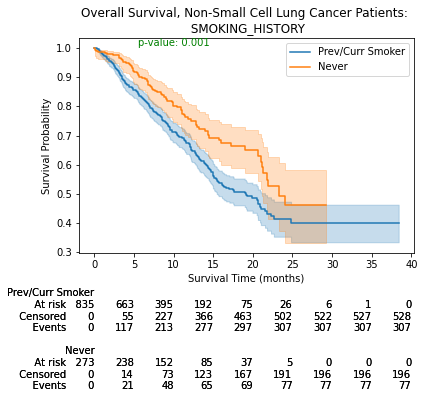

In [62]:
T = select_df['OS_MONTHS']
E = select_df['STATUS']
ex_col='SMOKING_HISTORY'
groups = select_df['SMOKING_HISTORY']
#g = (groups.isin(['Prev/Curr Smoker','Never']))
g1='Prev/Curr Smoker'
g2='Never'

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
kmf1 = KaplanMeierFitter()
kmf1.fit(T[groups==g1], E[groups==g1], label=g1)
ax = kmf1.plot_survival_function()

kmf2 = KaplanMeierFitter()
kmf2.fit(T[groups==g2], E[groups==g2], label=g2)
#ax = kmf.plot_survival_function(ax=ax, at_risk_counts=True)
ax = kmf2.plot_survival_function(ax=ax)
plt.title(f'Overall Survival, Non-Small Cell Lung Cancer Patients: \n {ex_col}')
plt.xlabel('Survival Time (months)')
plt.ylabel('Survival Probability')
add_at_risk_counts(kmf1, kmf2, ax=ax)

add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()
summary_= logrank_test(T[groups==g1].astype('float'), T[groups==g2].astype('float'), E[groups==g1], E[groups==g2], alpha=95)
plt.text(10,1,s= f'p-value: {round(summary_.p_value,4)}', ha='center', va='bottom', color='g')
plt.show()

In [63]:
print(summary_)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.88 <0.005     10.00


* There is a significant difference in overall survival between lung cancer patients with a previous history of smoking (or current smoker) vs. non-smoking patients (p<0.005)